### Homework-01

Supanat Jintawatsakoon<br>supanat.jtk@g.swu.ac.th

### 2. Data Wrangling and Pre-processing

2.1 ทําการอิมพอร์ตเพ็กเก็จและกําหนดค่าต่างๆที่จําเป็น

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm
from collections import OrderedDict
from scipy.stats import zscore
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

In [2]:
cmaps = OrderedDict()

2.2 เปลี่ยนไดเร็กทอรี่ไปที่ไดเร็กทอรี่ที่มีไฟล์ชุดข้อมูลอยู่และทําการอ่านไฟล์ชุดข้อมูลไปเก็บไว้ในตัวแปรชื่อ df

In [3]:
currentPath = os.getcwd()
subFolder = "/dataset/"
os.chdir(currentPath+subFolder)
fileName = "hw01_burger_king_nutrition_fact_sheet.csv";

In [4]:
df = pd.read_csv(fileName)
df.head()

,Nutrition facts,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
0,WHOPPER® Sandwiches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WHOPPER® Sandwich,270,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49,2.0,11.0,28.0
2,w/o Mayo,249,500.0,200.0,22.0,9.0,1.5,80.0,840.0,49,2.0,11.0,28.0
3,WHOPPER® Sandwich with Cheese,292,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50,2.0,11.0,32.0
4,w/o Mayo,271,580.0,260.0,29.0,13.0,1.5,105.0,1200.0,50,2.0,11.0,32.0


2.3 แสดงจํานวนแถวและจํานวนคอลัมน์ของชุดข้อมูล

In [5]:
print ("rows x colums")
print(df.shape)
print("rows : ", df.shape[0])
print("columns : ", df.shape[1])

rows x colums
(210, 13)
rows :  210
columns :  13


2.4 แสดงรายชื่อคอลัมน์ที่มีอยู่ในชุดข้อมูล

In [6]:
df.columns

Index(['Nutrition facts', ' serving size (g)', ' Calories',
       ' Calories from fat', ' Total fat (g)', ' Saturated Fat (g)',
       ' Trans Fat (g)', ' Chol (mg)', ' Sodium (mg)', ' Total Carb (g)',
       ' Dietary Fiber (g)', ' Total Sugar (g)', ' Protein (g)'],
      dtype='object')

2.5 ทําการลบช่องว่างที่อยู่หน้าชื่อคอลัมน์ออก เพื่อว่าเวลาอ้างถึงชื่อคอลัมน์จะได้ใช้ชื่อตรงๆได้เลยไม่ต้องพิมพ์ช่องว่าง

In [7]:
df.columns = map(lambda x: x.strip(), df.columns.values)

In [8]:
df.columns

Index(['Nutrition facts', 'serving size (g)', 'Calories', 'Calories from fat',
       'Total fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)', 'Chol (mg)',
       'Sodium (mg)', 'Total Carb (g)', 'Dietary Fiber (g)', 'Total Sugar (g)',
       'Protein (g)'],
      dtype='object')

2.6 นับจํานวนอาหารในชนิด burger, sandwich, salad, และ beverage พร้อมทั้งแสดงภาพโดยใช้ bar graph และ pie chart

- นับจํานวนอาหารที่มีอยู่ในแต่ละชนิดที่เป็นburger,sandwich,salad,และbeverage

In [9]:
mydict = dict()
mydict['burger'] = len(df[df['Nutrition facts'].str.contains('burger|Burger')])
mydict['sandwich'] = len(df[df['Nutrition facts'].str.contains('Sandwich|Sandwiches')])
mydict['salad'] = len(df[df['Nutrition facts'].str.contains('Salad|salad')])
mydict['beverage'] = len(df[df['Nutrition facts'].str.contains('Milk|Juice|Shake|Smoothie|Tea|Lemonade|Coke|Coca Cola|Orange|Punch|Sprite|Beer|Pepper')])

In [10]:
mydict

{'beverage': 26, 'burger': 13, 'salad': 6, 'sandwich': 14}

- สร้าง bar graph และ pie chart เพื่อแสดงสัดส่วนจํานวนอาหารที่มีอยู่ในแต่ละชนิด โดยให้กราฟทั้ง สองอยู่ใน figure เดียวกัน แต่คนละ subplots

In [11]:
mydict.values()

dict_values([13, 14, 6, 26])

In [12]:
cmaps['Set1'] = ['Pink', 'yellowgreen', 'lightskyblue', 'Gold',]

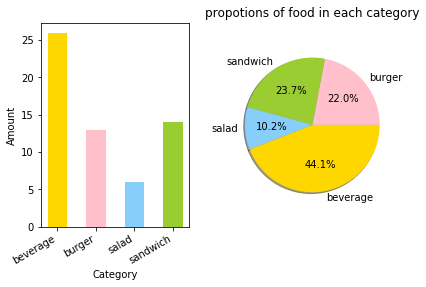

In [13]:

fig,axPlots = plt.subplots(1,2)
axPlots[0].bar(mydict.keys(), mydict.values(), width=0.5, align='center', color=cmaps['Set1']) 
axPlots[0].set_xlabel('Category')
axPlots[0].set_ylabel('Amount')
#axPlots[0].set_aspect(1)
axPlots[1].pie(mydict.values(), labels=mydict.keys(), autopct='%1.1f%%', startangle=0, shadow=True, colors=cmaps['Set1']) 
#axPlots[1].legend( loc="lower left",fontsize=6)
#axPlots[1].set_aspect(1)
plt.axis('equal')
plt.title('propotions of food in each category')
#plt.subplots_adjust(left=0.0, bottom=0.5, right=0.45)
fig.tight_layout()
fig.autofmt_xdate()


2.7 ทําการแทนค่าข้อมูลใน cell ที่มีแต่ช่องว่าง (whitespace) อย่างเดียวด้วย NaN —เนื่องจากข้อมูลในชุดข้อมูลอาจมี ข้อมูลที่เป็นช่องว่าง (whitespace) อย่างเดียว อยู่ โดยอาจจะเป็นความตั้งใจหรือความผิดพลาดของการป้อนข้อมูล หรือสร้างชุดข้อมูลขึ้นมา ซึ่งทําให้โปรแกรมคิดว่ามันเป็นข้อมูลชนิดหนึ่ง ไม่ใช้ข้อมูลที่ขาดหาย (missing value)

In [14]:
len(df[df.isnull().any(axis=1)])

28

- แทนค่าข้อมูลที่เป็นช่องว่างอย่างเดียวด้วยNaNเช่นในไฟลNcsvแทนที่,'',ด้วย,NaN,

In [15]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [16]:
len(df[df.isnull().any(axis=1)])

94

2.8 ลบแถวข้อมูลที่มีค่าNaNอยู่ไม่ว่าจะมีแค่คอลัมน์เดียวหรือทุกคอลัมน์ในแถวข้อมูลนั้นๆ

- แสดงลิสต์ของ row indices ที่มีค่า NaN

In [17]:
r_index = df[df.isnull().any(axis=1)].index.tolist()
#r_index

- แสดงจํานวนแถวข้อมูลที่มีค่า NaN อยู่ ซึ่งควรมี 94 แถว

In [18]:
len(r_index)

94

- ทําการลบแถวข้อมูลที่มีค่าNaNอยู่

In [19]:
#df.drop(r_index,inplace=True)
#df.reset_index(drop=True)
df.drop(r_index,inplace=True)


- ตรวจสอบจํานวนแถวของชุดข้อมูลหลังจากลบแถวที่มีค่า NaN ออกแล้ว ซึ่งควรเท่ากับ 210 − 94 = 116

In [20]:
print("number of rows: ", df.shape[0])

number of rows:  116


2.9 ตรวจสอบชนิดของข้อมูลในแต่ละคอลัมน์ ใน Pandas DataFrame

In [21]:
df.dtypes

Nutrition facts       object
serving size (g)      object
Calories             float64
Calories from fat    float64
Total fat (g)        float64
Saturated Fat (g)    float64
Trans Fat (g)        float64
Chol (mg)            float64
Sodium (mg)          float64
Total Carb (g)        object
Dietary Fiber (g)    float64
Total Sugar (g)      float64
Protein (g)          float64
dtype: object

- แปลงข้อมูลในคอลัมน์ serving size (g) และ Total Carb (g) จากชนิด object ไปเป็น float64

In [22]:
df['serving size (g)'] = df['serving size (g)'].astype(np.float64)
df['Total Carb (g)'] = df['Total Carb (g)'].astype(np.float64)

In [23]:
df.dtypes

Nutrition facts       object
serving size (g)     float64
Calories             float64
Calories from fat    float64
Total fat (g)        float64
Saturated Fat (g)    float64
Trans Fat (g)        float64
Chol (mg)            float64
Sodium (mg)          float64
Total Carb (g)       float64
Dietary Fiber (g)    float64
Total Sugar (g)      float64
Protein (g)          float64
dtype: object

2.10 แสดงค่าสถิติเชิงพรรณาสําหรับข้อมูลใน DataFrame

In [24]:
df.describe()

,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,155.017241,394.137931,197.672414,21.935345,6.939655,0.379310,66.379310,764.655172,34.387931,1.879310,8.870690,15.224138
std,100.782071,243.742804,148.045867,16.483395,5.962986,0.762207,80.202424,555.232706,18.859098,1.784743,8.828344,13.954638
min,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,87.000000,227.500000,100.000000,11.000000,2.875000,0.000000,10.000000,260.000000,26.000000,1.000000,2.000000,4.000000
50%,135.000000,335.000000,155.000000,17.000000,5.000000,0.000000,32.500000,720.000000,31.000000,1.000000,7.000000,12.000000
75%,214.500000,510.000000,270.000000,30.000000,9.000000,0.500000,101.250000,1080.000000,48.000000,2.000000,11.000000,23.250000
max,464.000000,1190.000000,710.000000,79.000000,31.000000,3.500000,375.000000,2460.000000,123.000000,9.000000,41.000000,61.000000


2.11 วาด scatter plot แสดงความสัมพันธ์ระหว่างจํานวน serving size (g) และ Calories

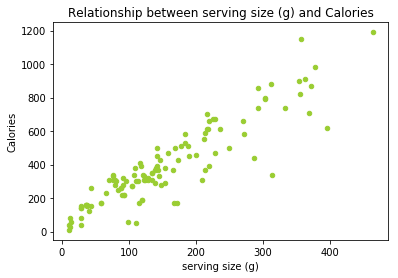

In [25]:
df.plot.scatter(x='serving size (g)', y='Calories',color='YellowGreen',s=20,
                title='Relationship between serving size (g) and Calories');


2.12 แปลงค่าปริมาณสารอาหาร ให้อยู่ในอัตราส่วนของ serving size (g) ที่เท่ากัน —เนื่องจากปริมาณสารอาหารใน
อาหารแต่ละชนิด มาจากปริมาณ serving size (g) ที่ต่างกัน ดังนั้น เราควรจะแปลงค่ามันให้เทียบมาจาก ปริมาณ serving size (g) ที่เท่าๆกัน โดยมีหลักคิดคือ —ถ้า ปริมาณ serving size = s, มีปริมาณสารอาหารในคอลัมน์ B = b ดังนั้น ที่ปริมาณ serving size = max_s จะมีปริมาณสารอาหารในคอลัมน์ B = b ∗ max_s/s

In [26]:
df['serving size (g)'].nlargest(5)

83    464.0
63    395.0
9     377.0
84    371.0
64    369.0
Name: serving size (g), dtype: float64

- หาปริมาณ serving size (g) ที่สูงที่สุดในชุดข้อมูล และเก็บไว้ในตัวแปรชื่อ max_ss

In [27]:
max_ss = max(df['serving size (g)'])
print("MAX Serving Size : ",max_ss)

MAX Serving Size :  464.0


- แปลงค่าปริมาณสารอาหารในคอลัมน์ต่างๆ โดยเทียบกับ serving size (g) ที่สูงที่สุด

In [28]:
orig_serving_size = df['serving size (g)'].copy()
df[df.select_dtypes(include=['float64']).columns] = df[df.select_dtypes(include=['float64']).columns]*max_ss
df = df[df.select_dtypes(include=['float64']).columns].div(orig_serving_size.values, axis='rows')

2.13 ตรวจดูว่าาข้อมูลมีค่าที่ต่ำหรือสูงผิดปกติ (outliers) หรือไม่

วาด boxplot สําหรับข้อมูลทุกคอลัมน์ ยกเว้นคอลัมน์แรกที่ไม่ใช่ข้อมูลตัวเลข โดยให้ boxplots ทุกอันอยู่ใน figure และ plot เดียวกัน 

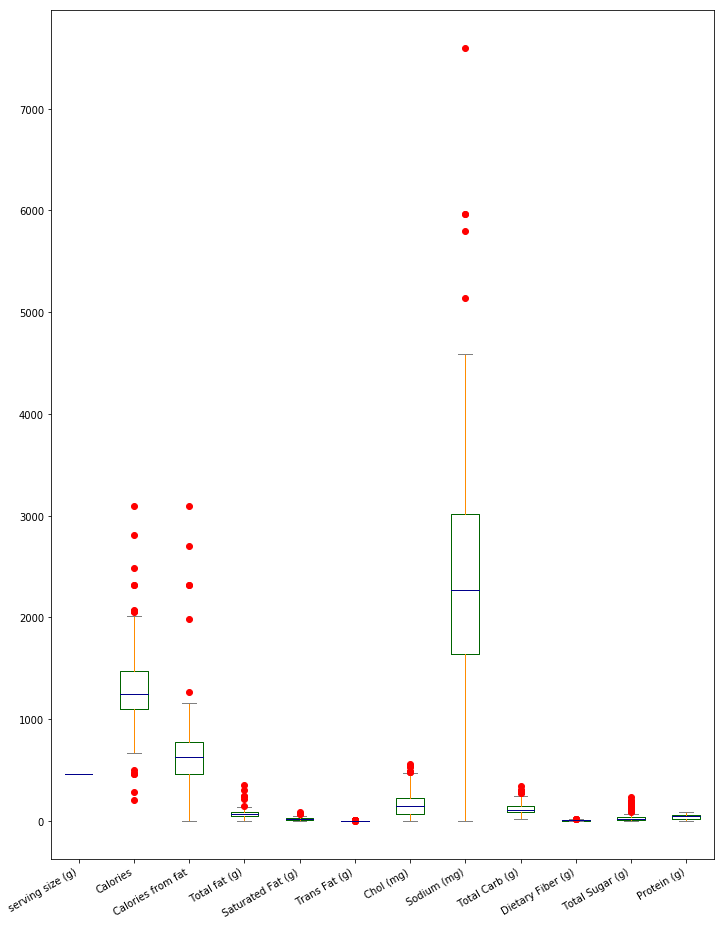

In [29]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
fig, ax = plt.subplots()
df.plot.box(color=color,ax=ax,figsize=(10, 15),sym='ro')
fig.tight_layout()
fig.autofmt_xdate()

<b>หมายเหตุ:</b> data points ที่อยู่นอก boxplot จะถูกพิจารณาว่าเป็น outliers

- แปลงค่าข้อมูลไปเป็นค่า Z หรือ ค่ามาตรฐาน (standard value) เพื่อดูว่ามีค่าใดบ้างที่ต่ำกว่า -3 หรือสูงกว่า
3 หรือไม่

In [30]:
#df_zscore = df[df.columns[1:]].apply(zscore)
df_zscore = df[df.columns[0:]].apply(zscore)
df_zscore.head()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2247: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
1,NaN,-0.374276,-0.100068,-0.099859,-0.099201,1.209825,-0.122725,-0.590485,-0.563701,-0.460491,-0.413159,0.402347
2,NaN,-0.807168,-0.622698,-0.632233,-0.355552,1.358870,-0.160304,-0.683228,-0.464098,-0.398255,-0.384254,0.582510
3,NaN,-0.285198,0.003471,-0.016291,0.220472,1.621377,0.065983,-0.243095,-0.630395,-0.516091,-0.438981,0.523581
4,NaN,-0.676045,-0.468708,-0.466117,0.009704,1.203304,0.046079,-0.301390,-0.544046,-0.463215,-0.414424,0.698512
5,NaN,-0.212773,0.082139,0.079710,0.260966,1.542278,0.124327,-0.040517,-0.670849,-0.540862,-0.450485,0.645580


2.14 ลบแถวข้อมูลที่มี outliers อยู่

- พิมพ์ลิสต์ของ indice ของแถวของข้อมูลที่มี outliers อยู่ (อ้างอิง: https://pyformat.info/)

In [31]:
def find_outlier(df, df_zscore):
             for col in df.loc[:, 'serving size (g)':].columns:
                 ind = df_zscore.loc[(df_zscore[col]>3) | (df_zscore[col]<-3)].index.tolist()
                 print('Column name: {}, Row index: {}'.format(col, ind))

In [32]:
find_outlier(df, df_zscore)

Column name: serving size (g), Row index: []
Column name: Calories, Row index: [66, 124]
Column name: Calories from fat, Row index: [66, 124, 128, 131]
Column name: Total fat (g), Row index: [66, 124, 128, 131]
Column name: Saturated Fat (g), Row index: [107, 122]
Column name: Trans Fat (g), Row index: []
Column name: Chol (mg), Row index: []
Column name: Sodium (mg), Row index: [122]
Column name: Total Carb (g), Row index: [126]
Column name: Dietary Fiber (g), Row index: []
Column name: Total Sugar (g), Row index: [125]
Column name: Protein (g), Row index: []


<b>หมายเหตุ:</b> ลองเปรียบเทียบจํานวน outliers ในแต่ละคอลัมน์ กับ boxplot ที่สร้างไว้ก่อนหน้านี้ จะพบว่า จํานวน data points ที่อยู่นอก boxplot จะใกลเคียงกับจํานวน outliers ที่หาได้ด้วย Z-score

- รวบรวม indice ของแถวข้อมูลที่มี outliers อยู่ และเก็บไว้ในตัวแปรชื่อ outlier_ind_lst

In [33]:
def collect_outlier_indice(df, df_zscore):
             item_list=[]
             seen = set(item_list)
             for col in df.loc[:, 'serving size (g)':].columns:
                 item_list = df_zscore.loc[(df_zscore[col]>3) | (df_zscore[col]<-3)].index.tolist()
                 for item in item_list:
                     #print(item)
                     if item not in seen:
                         #print(item)
                         seen.add(item)
                         #item_list.append(item)
             outlier_indice_lst = list(seen)
             #print(outlier_indice_lst)
             return outlier_indice_lst
             #return seen


เรียกใช้ฟังก์ชันcollect_outlier_indice()โดยให้เก็บค่าที่คืนไว้ในตัวแปรชื่อ outlier_ind_lst

In [34]:
outlier_ind_lst = collect_outlier_indice(df,df_zscore)
outlier_ind_lst

[128, 66, 131, 107, 122, 124, 125, 126]

ทําการลบแถวข้อมูลที่มี outliers อยู่ออกจากชุดข้อมูล

In [35]:
df.drop(outlier_ind_lst,inplace=True)
df=df.reset_index(drop=True)
print(df.shape[0])

108


2.15 วาด scatter plot เพื่อพิจารณาความสัมพันธ์ระหว่างปริมาณแคลลอรี่ (Calories) และสารอาหารอื่นๆ โดยให้แบ่ง เป็น subplots ที่มี 2 แถวและ 5 คอลัมน์

• Calories และ Calories from fat <br>
• Calories และ Total fat (g)<br>
• Calories และ Trans Fats (g)<br>
• Calories และ Saturated Fat (g) <br>
• Calories และ Chol (mg)<br>
• Calories และ Sodium (mg)<br>
• Calories และ Total Carb (g)<br>
• Calories และ Dietary Fiber (g)<br>
• Calories และ Total Sugar (g) <br>
• Calories และ Protein (g)

In [36]:
df

,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
0,464.0,1134.222222,618.666667,68.740741,20.622222,2.577778,154.666667,1684.148148,84.207407,3.437037,18.903704,48.118519
1,464.0,931.726908,372.690763,40.995984,16.771084,2.795181,149.076305,1565.301205,91.309237,3.726908,20.497992,52.176707
2,464.0,1175.890411,667.397260,73.095890,25.424658,3.178082,182.739726,2129.315068,79.452055,3.178082,17.479452,50.849315
3,464.0,993.062731,445.166052,49.653137,22.258303,2.568266,179.778598,2054.612546,85.608856,3.424354,18.833948,54.789668
4,464.0,1209.768977,704.422442,78.099010,26.033003,3.062706,191.419142,2388.910891,76.567657,3.062706,16.844884,53.597360
5,464.0,1225.082508,704.422442,78.099010,26.033003,3.062706,191.419142,2358.283828,81.161716,3.062706,21.438944,53.597360
6,464.0,1179.661017,681.581921,76.022599,26.214689,3.932203,229.378531,1376.271186,64.225989,2.621469,14.418079,62.915254
7,464.0,1031.111111,501.621622,55.735736,23.687688,3.483483,229.909910,1267.987988,68.276276,2.786787,15.327327,65.489489
8,464.0,1206.153846,713.846154,78.769231,29.538462,3.692308,240.000000,1735.384615,61.538462,2.461538,13.538462,64.000000
9,464.0,1071.774648,548.957746,61.430986,27.447887,3.921127,241.802817,1659.943662,65.352113,2.614085,14.377465,67.966197


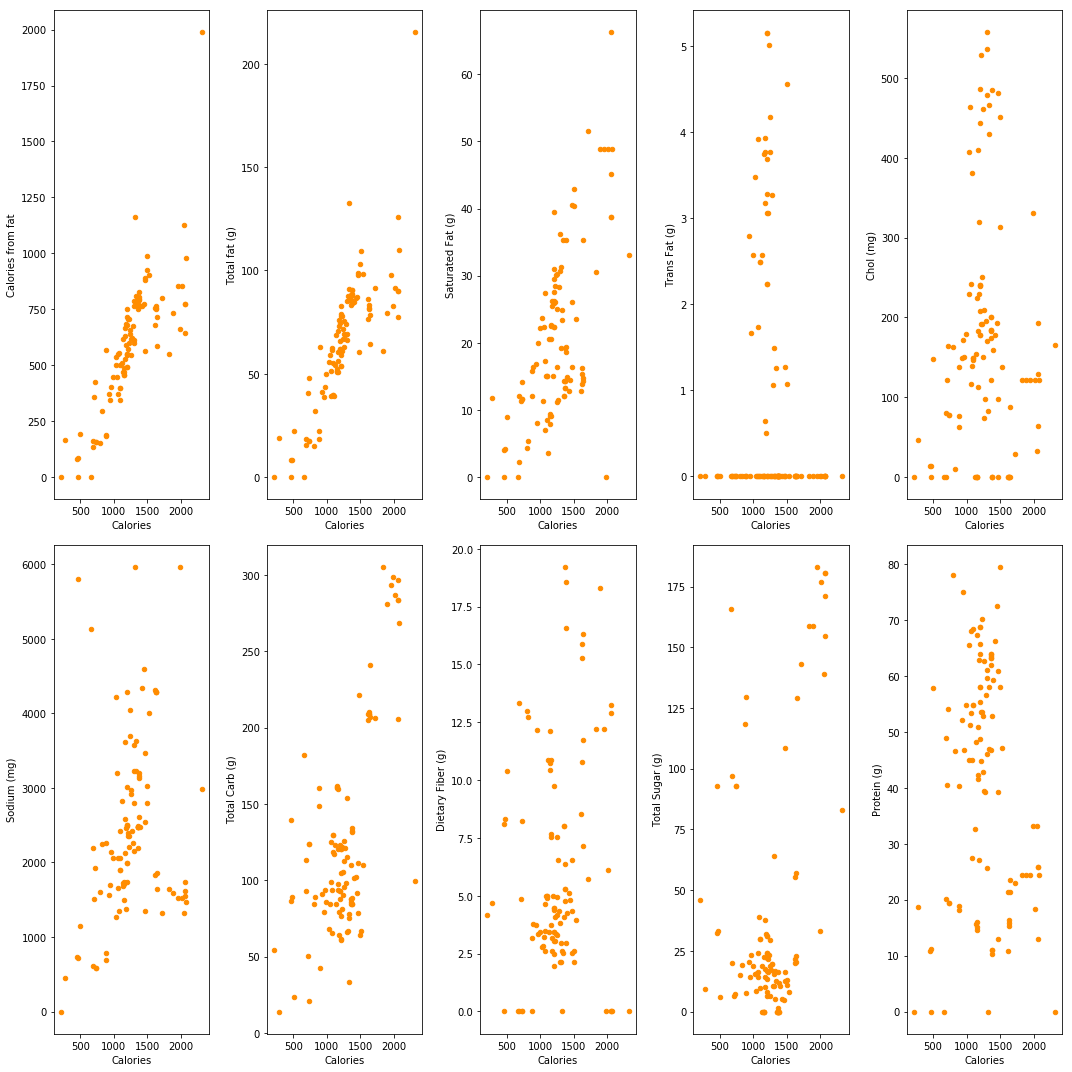

In [37]:
fig, ax = plt.subplots(2,5,figsize=(15,15))
k = 2
for i in range(0, 2):
    for j in range(0, 5):
        df.plot.scatter(ax = ax[i,j] ,x='Calories', y=df.columns[k],color='DarkOrange',s=20);
        k = k + 1
fig.tight_layout()

2.16 คํานวณค่าสหสัมพันธ์ (correlation) ระหว่าง Calories และสารอาหารอื่นๆ

In [38]:
for i in range(3, len(df.columns)):
        print('Correlation between Calories and ',df.columns[i],' : ',df['Calories'].corr(df[df.columns[i]]))
        

Correlation between Calories and  Total fat (g)  :  0.822282659511
Correlation between Calories and  Saturated Fat (g)  :  0.646009547445
Correlation between Calories and  Trans Fat (g)  :  -0.0855395739594
Correlation between Calories and  Chol (mg)  :  0.0847179470534
Correlation between Calories and  Sodium (mg)  :  0.239843442912
Correlation between Calories and  Total Carb (g)  :  0.653532271306
Correlation between Calories and  Dietary Fiber (g)  :  0.141014123008
Correlation between Calories and  Total Sugar (g)  :  0.393023932699
Correlation between Calories and  Protein (g)  :  -0.0777115402102


<b>หมายเหตุ:</b> เมื่อพิจารณาจากตารางค่าสหสัมพันธ์ จะพบว่า:<br>
• Calories from fat, Total fat (g), Saturated Fat (g), Chol (mg), Sodium (mg), Total Carb (g), และ
Protein (g) มีค่าสหสัมพันธ์กับ Calories เกินกว่า 0.60<br>
• Calories from fat และ Total fat (g) มีค่าสหสัมพันธ์กัน 0.99 ซึ่งเสมือนเป็นค่าเดียวกัน<br>
• ค่าปริมาณไขมัน Total fat (g) สามารถแยกเป็น Trans fat (g) และ Saturated fat (g) ซึ่งเราจะใช้สองค่านี้ แทน Total fat (g)<br>
• Calories from fat และ Total fat (g) มีค่าสหสัมพันธ์กัน 0.99 ซึ่งเสมือนเป็นค่าเดียวกัน ดังนั้นเราจะตัด Calories from fat ออกเช่นกัน<br>

### 3. Regression Analysis

จากการทํา data wrangling and pre-processing ในขั้นตอนก่อนหน้านี้ ทําให้เราสามารถสร้างสมการถดถอยชนิด หลายตัวแปรได้ดังนี้<br><br>
$$Y =b0+b1·X1+b2·X2+b3·X3+b4·X4+b5·X5+b6·X6+b7·X7$$ <br>โดยที่<br>
• Y = ’Calories’<br>
• X1 = ’Saturated Fat (g)’<br>
• X2 = ’Trans Fat (g)’<br>
• X3 = ’Chol (mg)’<br>
• X4 = ’Sodium (mg)’<br>
• X5 = ’Total Carb (g)’<br>
• X6 = ’Total Sugar (g)’<br>
• X7 = ’Protein (g)’<br>

In [39]:
X = df[['Saturated Fat (g)', 'Trans Fat (g)', 'Chol (mg)', 'Sodium (mg)', 'Total Carb (g)',
        'Total Sugar (g)', 'Protein (g)']]
y = df[['Calories']]

3.1. สร้างสมการถดถอยจากชุดข้อมูลและเก็บไว้ในตัวแปรชื่อ model1

In [40]:
model1 = smf.ols(formula='y~X', data=df).fit()

3.2 แสดงค่าสัมประสิทธิ์ของสมการสําหรับ model1

In [41]:
model1.params

Intercept    145.039878
X[0]          20.664067
X[1]         -44.634055
X[2]          -0.322857
X[3]           0.068221
X[4]           4.576009
X[5]          -3.123829
X[6]           3.786273
dtype: float64

3.3 แสดงข้อมูลทางสถิติของmodel1

In [42]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     63.43
Date:                Tue, 27 Feb 2018   Prob (F-statistic):           5.83e-34
Time:                        20:51:50   Log-Likelihood:                -707.22
No. Observations:                 108   AIC:                             1430.
Df Residuals:                     100   BIC:                             1452.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    145.0399     76.427      1.898      0.061      -6.590     296.670
X[0]          20.6641      1.911     10.811      0.000      16.872      24.456
X[1]         -44.6341     14.381     -3.104      0.002     -73.166     -16.102
X[2]          -0.3229      0.166     -1.945      0.055      -0.652       0.006
X[3]           0.0682      0.017      4.058      0.000       0.035       0.102
X[4]           4.5760      0.432     10.584      0.000       3.718       5.434
X[5]          -3.1238      0.630     -4.956      0.000      -4.374      -1.873
X[6]           3.7863      1.235      3.067      0.003       1.337       6.236
==============================================================================
Omnibus:                       96.461   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1525.490
Skew:                           2.715   Prob(JB):                         0.00
Kurtosis:                      20.593   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>หมายเหตุ:</b> จากค่าสรุป จะพบว่า ตัวแปรทำนายทุกตัวมีค่า p-value ต่ำกว่า 0.05 และค่า Adjusted R-squared เท่ากับ 0.945 ซึ่งเป็นค่าสูง แต่อย่างไรก็ตาม ค่า p-value ของ intercept เท่ากับ 0.087 ซึ่งสูงกว่า 0.05 ดังนั้นเราจะลองตัดค่าสัมประสิทธิ์ออก โดยบังคับให้สมการถดถอยตัดที่จุดกำเนิด เช่น (0, 0, 0, 0, 0, 0, 0)

3.4 ทดลองสร้างสมการถดถอย โดยไม่ใช้ค่า intercept <br>—ใช้สมการ $$formula =y\sim X − 1$$ และให้เก็บไว้ในตัวแปรชื่อ model2


In [43]:
model2 = smf.ols(formula='y~X-1', data=df).fit()

3.5 แสดงค่าสัมประสิทธิ์ของสมการสำหรับ model2

In [44]:
model2.params

X[0]    20.851062
X[1]   -46.539925
X[2]    -0.349911
X[3]     0.082598
X[4]     4.914172
X[5]    -3.015981
X[6]     5.240656
dtype: float64

In [45]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     825.7
Date:                Tue, 27 Feb 2018   Prob (F-statistic):           4.13e-86
Time:                        20:51:50   Log-Likelihood:                -709.13
No. Observations:                 108   AIC:                             1432.
Df Residuals:                     101   BIC:                             1451.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X[0]          20.8511      1.933     10.786      0.000      17.016      24.686
X[1]         -46.5399     14.530     -3.203      0.002     -75.363     -17.717
X[2]          -0.3499      0.167     -2.089      0.039      -0.682      -0.018
X[3]           0.0826      0.015      5.435      0.000       0.052       0.113
X[4]           4.9142      0.399     12.318      0.000       4.123       5.706
X[5]          -3.0160      0.636     -4.743      0.000      -4.277      -1.755
X[6]           5.2407      0.980      5.346      0.000       3.296       7.185
==============================================================================
Omnibus:                      102.604   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1906.749
Skew:                           2.907   Prob(JB):                         0.00
Kurtosis:                      22.747   Cond. No.                     2.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>หมายเหตุ:</b> ผลลัพธ์จากการตัดค่า intercept ออกพบว่า ค่า p-Value ของตัวแปรทำนายทุก ตัวมี่ค่าต่ำกว่า 0.05 และค่า Adjusted R-squared เพิ่มขึ้นเป็น 0.987 อย่างไรก็ตาม สมการถดถอยที่ไม่มีค่า intercept อยู่จะหมายถึง สมการที่ปริมาณแคลลอรี่ ขึ้นอยู่กับปริมาณสารอาหารในตัวแปรที่กำหนดเท่านั้น แต่ในความเปนจริงอาจจะขึ้นอยู่กับปริมาณสารอาหารอื่นๆที่ ไม่ได้อยู่ในสมการก็ได้ ดังนั้นสมการจึงไม่สะท้อนถึงข้อเท็จจริงเท่าไหร่ —ตรวจดูการประเมินสมรรถนะในเนื้อหาส่วนถัดไป

### 4. Performance Evaluation


นอกจากค่า p-Value และค่า Adjusted R-squared ที่ใช้สำหรับการบ่งชี้ถึงโมเดลสมการถดถอยที่ดีแล้วเราสามารถใช้ค่าความคลาดเคลื่อนจากการทำนายในการประเมินสมรรถนะของแบบจำลองเช่นกัน ซึ่งค่าที่รู้จักกันดีคือ Root Mean Squared Error (RMSE)

1.ทำนายค่า Calories จาก model1 และ model2


In [46]:
ypred1 = model1.predict(X)
ypred2 = model2.predict(X)

2.คำนวณค่า root mean squared error ของ model1 และ model2

In [47]:
rmse1 = sqrt(mean_squared_error(y, ypred1))
rmse2 = sqrt(mean_squared_error(y, ypred2))

In [48]:
print ('RMSE for Model 1 :',rmse1)
print ('RMSE for Model 2 :',rmse2)

RMSE for Model 1 : 168.910034709306
RMSE for Model 2 : 171.9247370129217


In [49]:
rmse1 = rmse(y,ypred1,axis=0)
rmse2 = rmse(y,ypred2,axis=0)